In [1]:
# Data Processing
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

# Basic Visualization tools
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 300

In [2]:
data = pd.read_csv('./StudentsPerformance.csv')

In [3]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


##### Before we start Plotly...¶
* Plotly's main object is `Figure()` object.
* `add_trace` can consider as 'stacking figures'.
* I will use these libraries :
    * import `plotly.graph_objects` as `go`
    * import `plotly.express` as `px`
    * import `plotly.figure_factory` as `ff`

##### Check NULL Data

<Axes: >

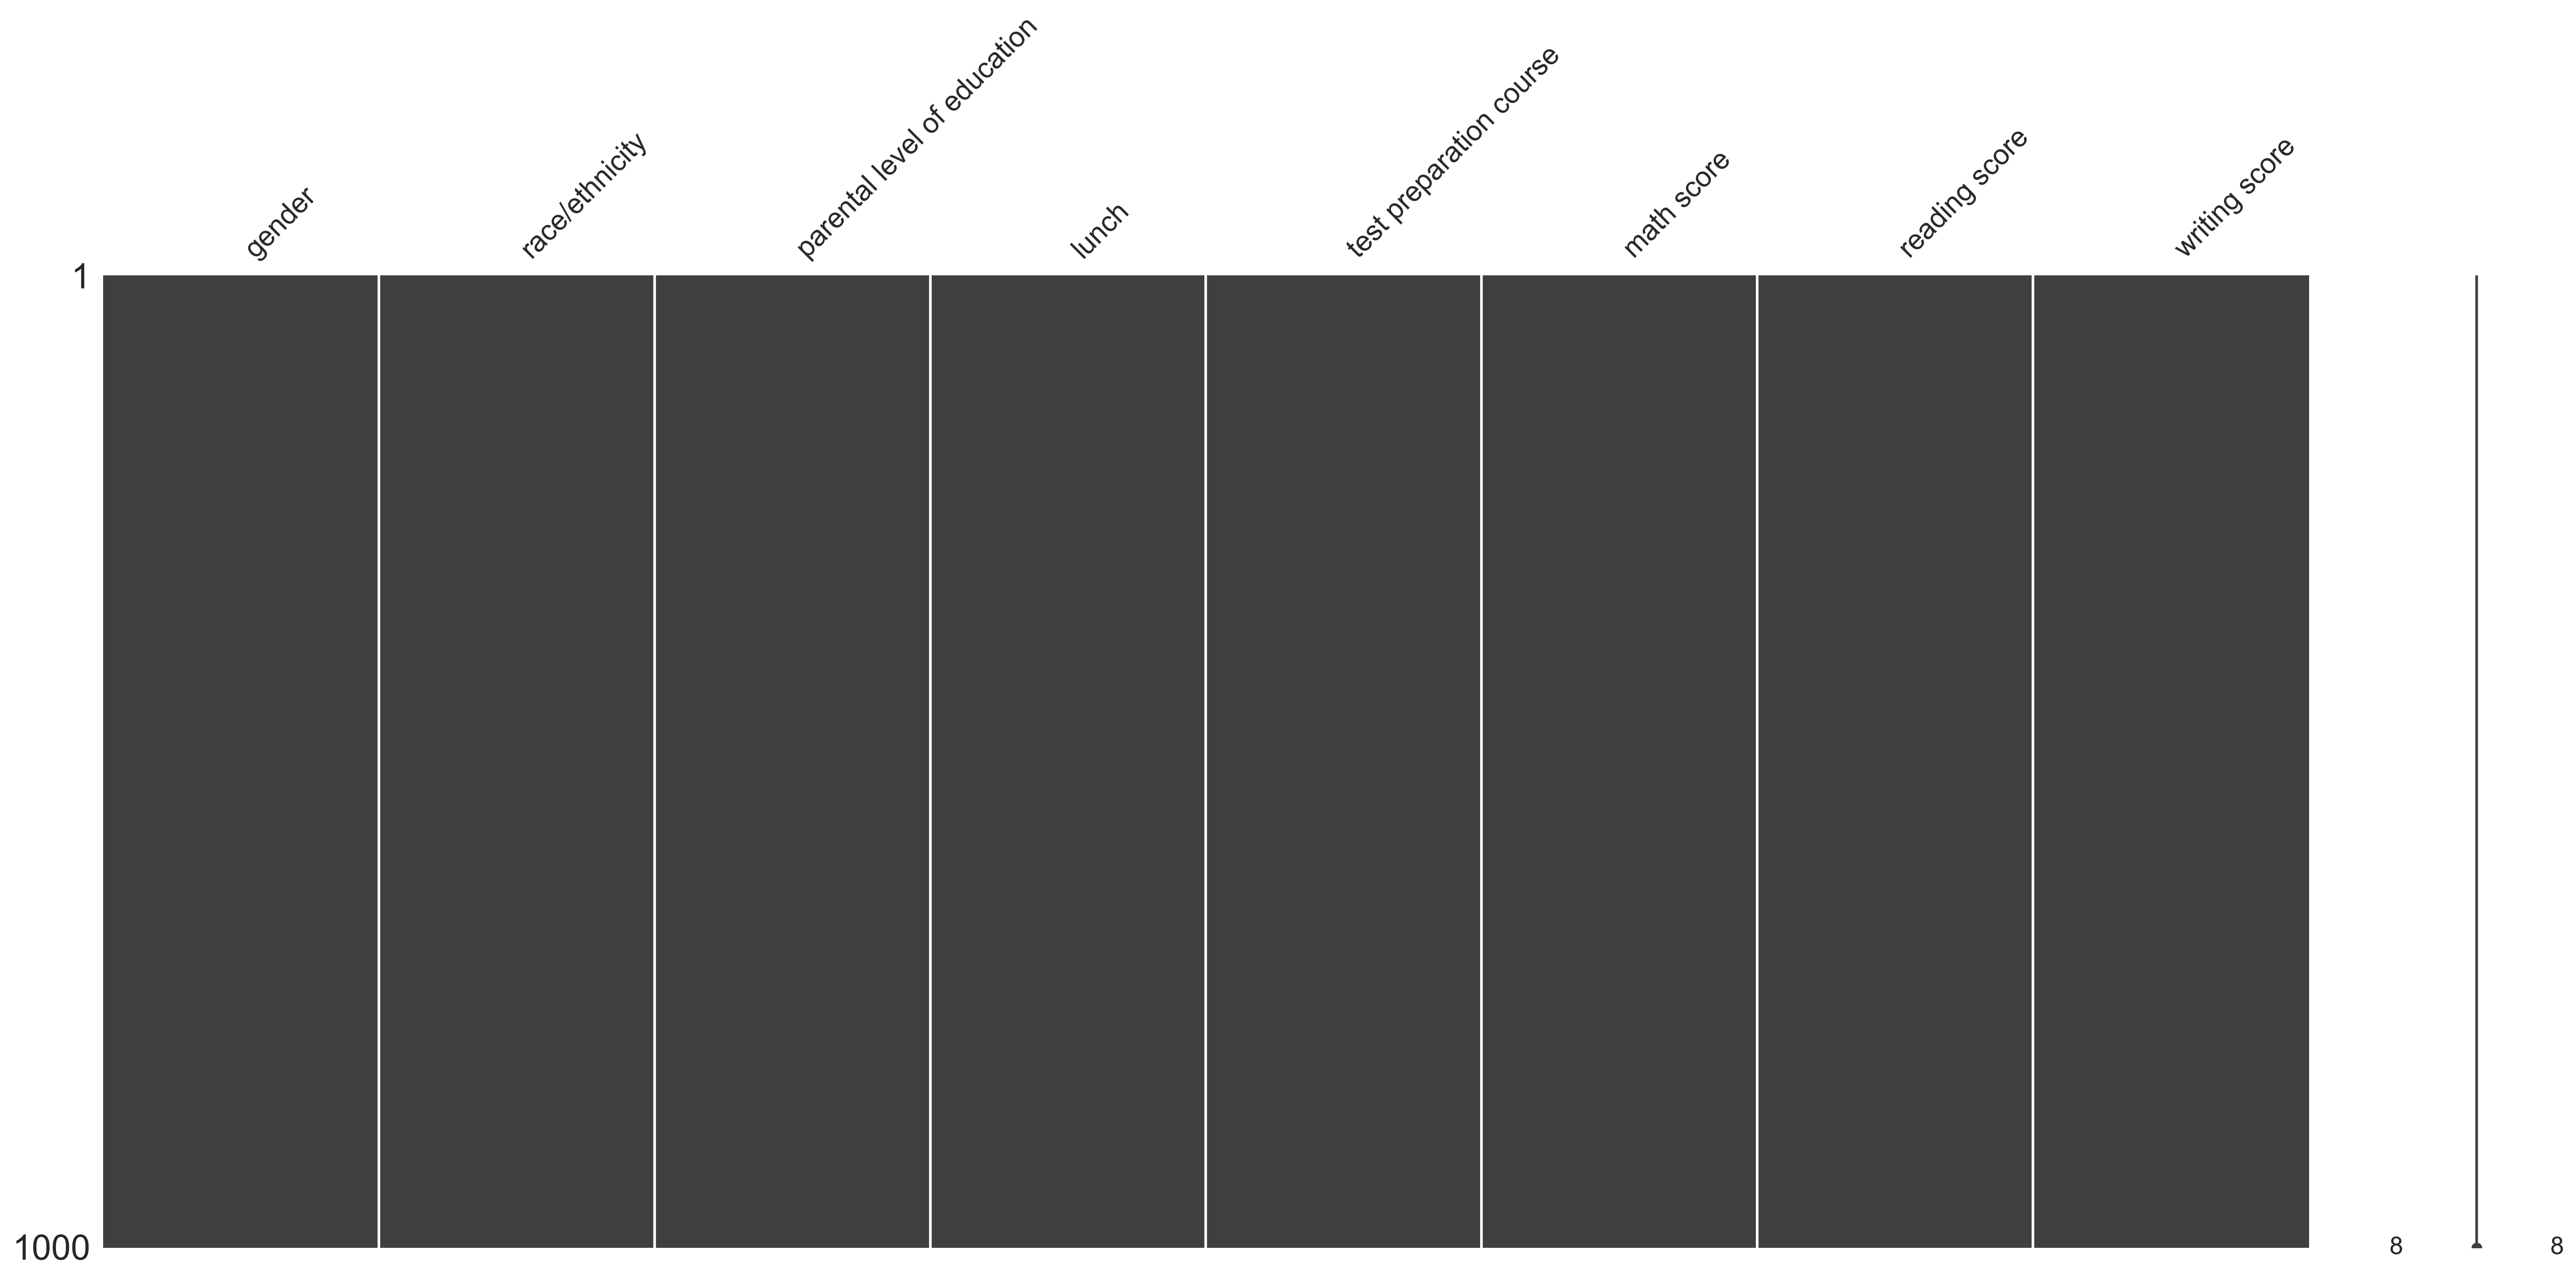

In [4]:
import missingno as msno
msno.matrix(data)

### Table View

In [5]:
display(data)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


##### Plotly : go.Table
* Tables

You can see this table in plotly. (or you can custom every table what you want )

`go.Table` provides a Table object for detailed data viewing.

The data are arranged in a grid of rows and columns. Most styling can be specified for header, columns, rows or individual cells. Table is using a column-major order, ie. the grid is represented as a vector of column vectors.

First need to initialize headers & cells.

In [6]:
# Type 1 : Default

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Table(header=dict(values=data.columns, fill_color='paleturquoise'),
             cells=dict(values=data.head(3).T, fill_color='lavender'))
)
fig.show()

### Countplot
__Seaborn : countplot, barplot + value_counts()__
In seaborn, we can easily draw these graph

* Countplot : Show the counts of observations in each categorical bin using bars.

__Little tips__

* If you want to make it vertical, replace x by y.
* Use `alpha` parameter to set opacity for more readable plot
* Use `hue` to find features' trend
* use `plt.xticks` or `plt.yticks` to rotation xaxis label.

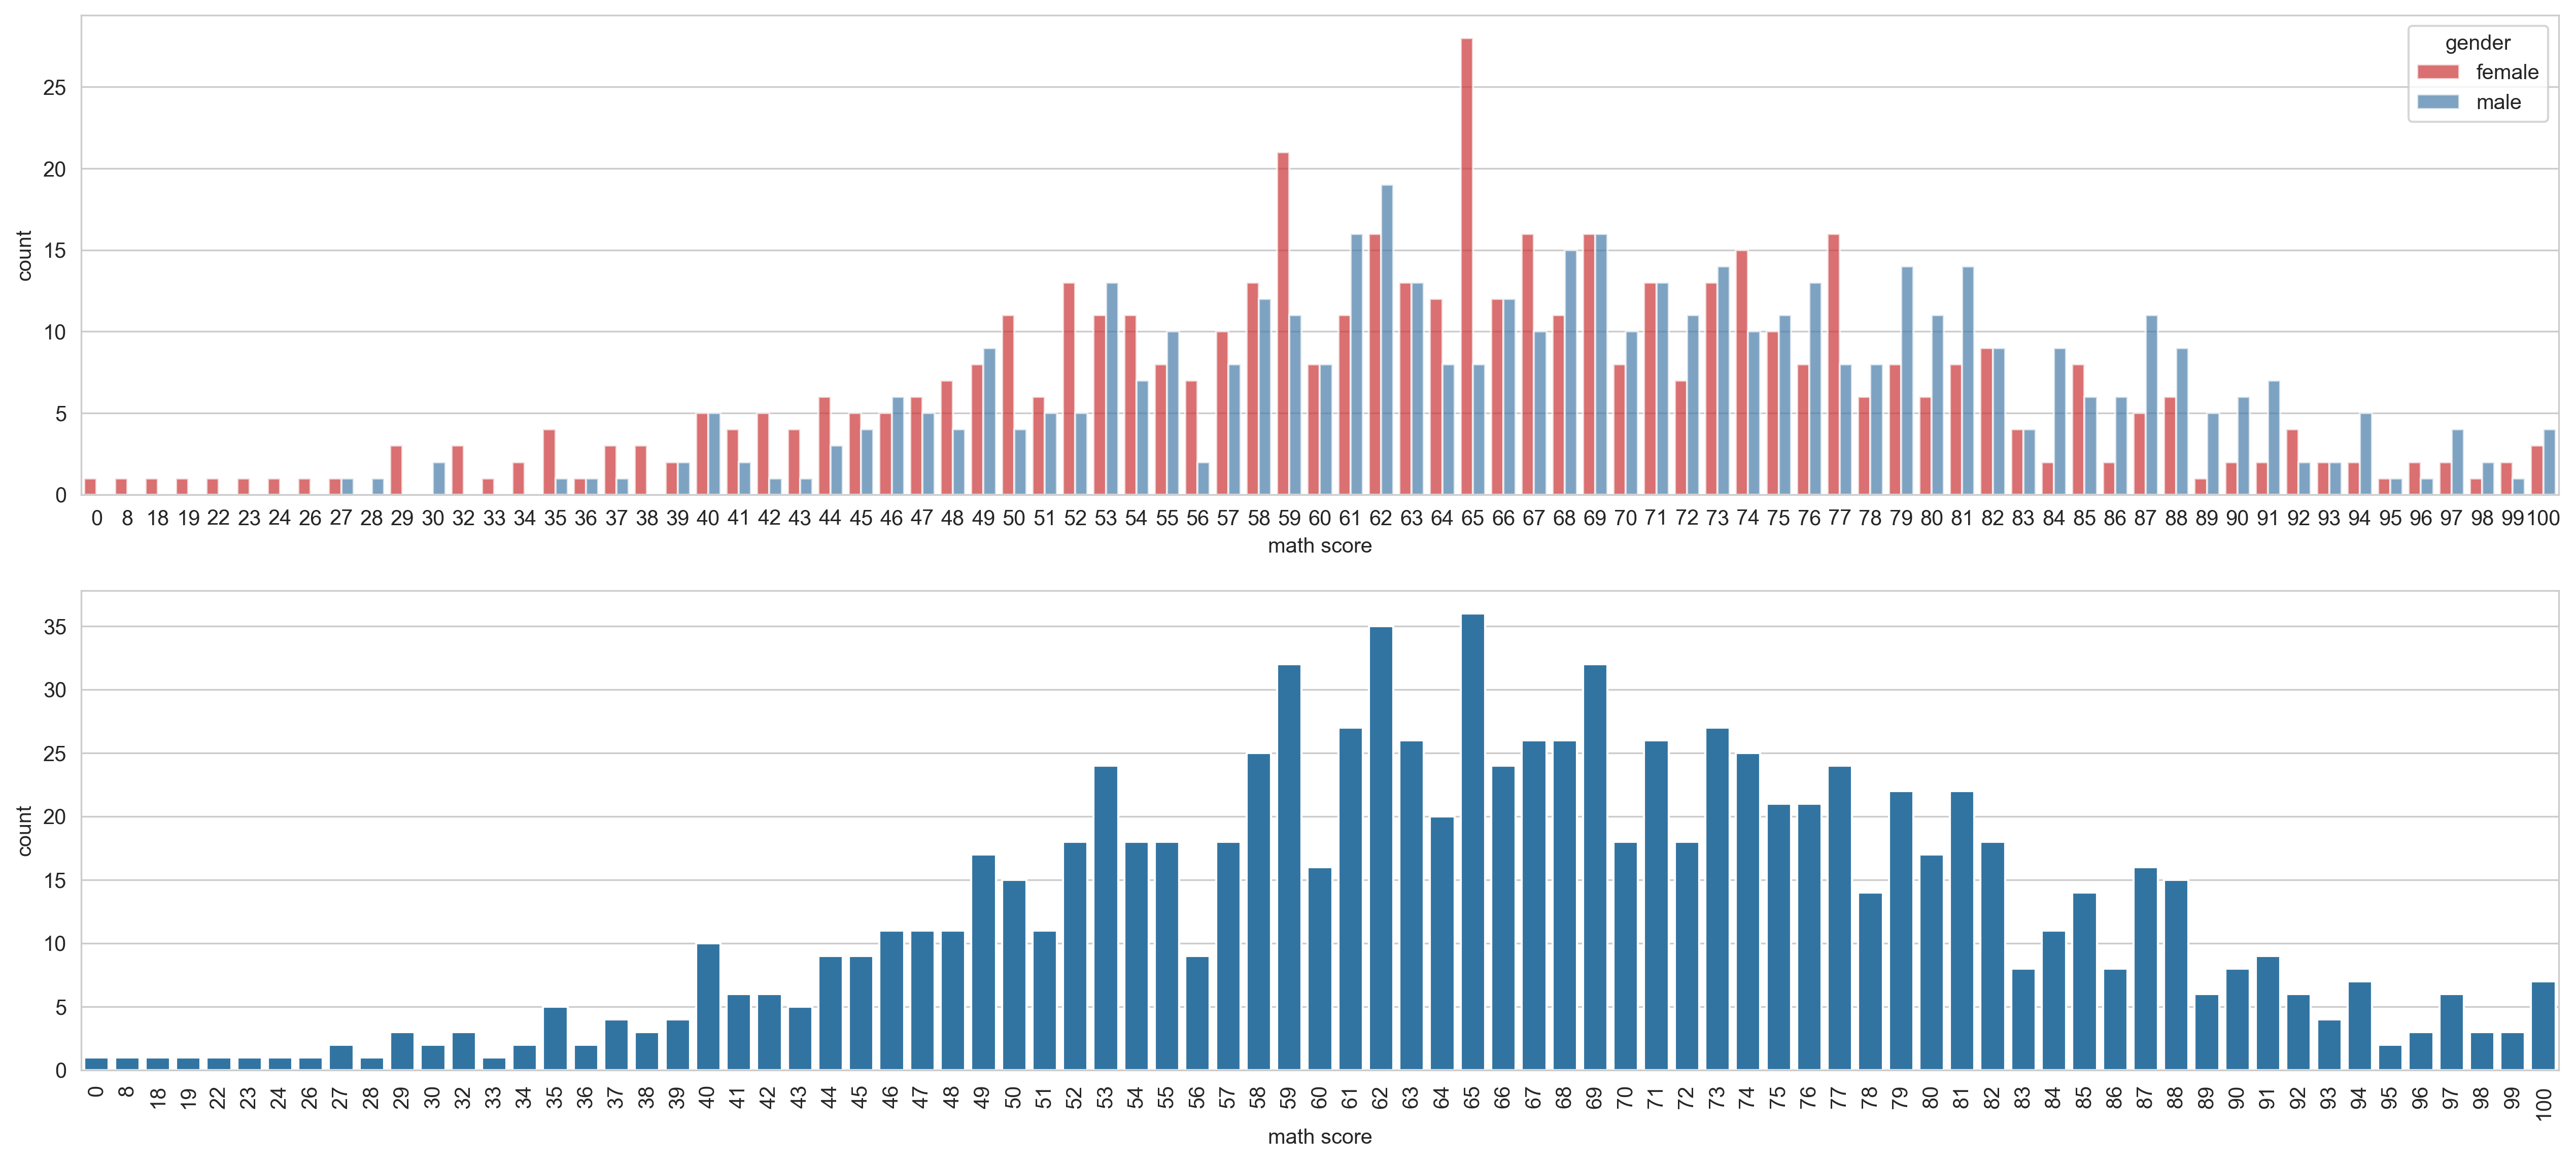

In [7]:
fig, ax = plt.subplots(2,1,figsize=(21, 9))

# Type 1 : Use Hue Parameter
sns.countplot(
    x=data['math score'], 
    data=data, 
    hue=data['gender'], 
    palette='Set1', 
    alpha=0.7, 
    ax=ax[0], 
    legend='auto')
plt.xticks(rotation='vertical')

# Type 2 : Use value_counts + barplot / hard to divide like hue
sns.barplot(
    x=data['math score'].value_counts().index,
    y=data['math score'].value_counts(), ax=ax[1]
)
plt.show()

##### __Plotly : px.histogram, go.Histogram__
* Histograms

Plotly doesn't have `countplot`. But with simple trick, we can make countplot. (or You can use `value_counts` + `bar` trick again)

`plotly.express` and `plotly.graph_objects` have `histogram` plot.

We can set x and y parameter same feature(it means y is number of x), and set color like hue.

you can change barmode as group

In [8]:
import plotly.express as px

# Type 1 : Stacked Graph (default)
fig = px.histogram(data_frame=data, x=data['math score'], y=data['math score'], color=data['gender'])
fig.show()

# Type 2 : Group
fig = px.histogram(data_frame=data, x=data['math score'], y=data['math score'], color=data['gender'])
fig.update_layout(barmode='group')
fig.show()

You can add marginal parameter to show simple distribution.

As you will see below, the marginal part above is set to `boxplot`.

It is a graph that shows the quadrant, the median and the outlier.

In [9]:
fig = px.histogram(data_frame=data, x=data['math score'], y=data['math score'], color=data['gender'], marginal='box')
fig.show()

### __Distplot__
Seaborn : distplot
* Distplot : Flexibly plot a univariate distribution of observations.

`distplot` is similar to `countplot` because countplot is a histogram according to _frequency_.

Basically, you can look at it with histogram, so it's easier to see trends than countplot.

You cannot set the hue separately, so you need to draw the graphs individually. (you can add `label`)



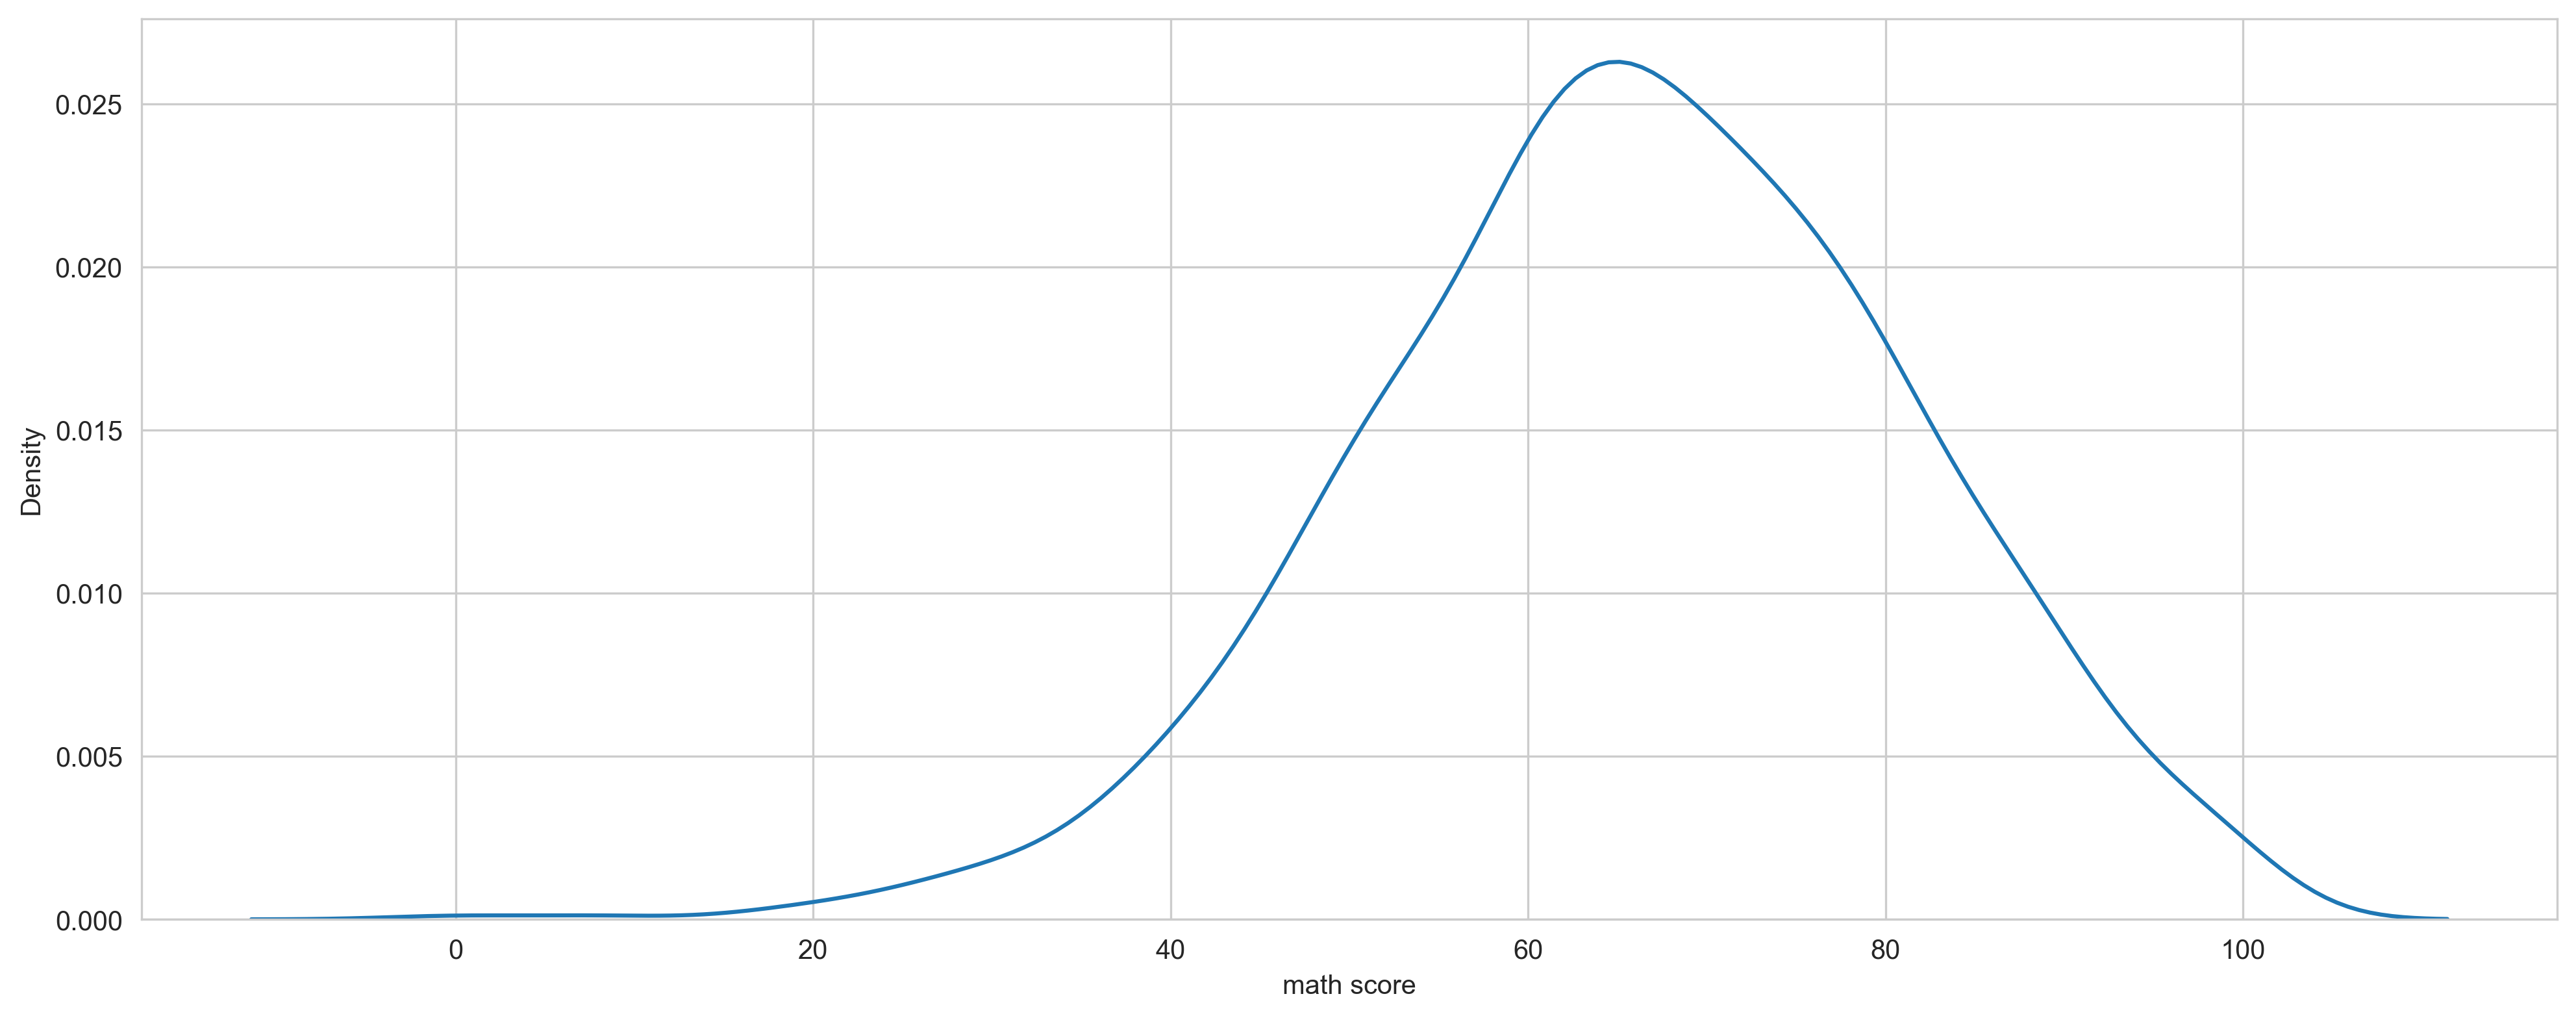

In [10]:
# Type 1 : default view
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.kdeplot(data=data['math score'], common_norm=False)
plt.show()

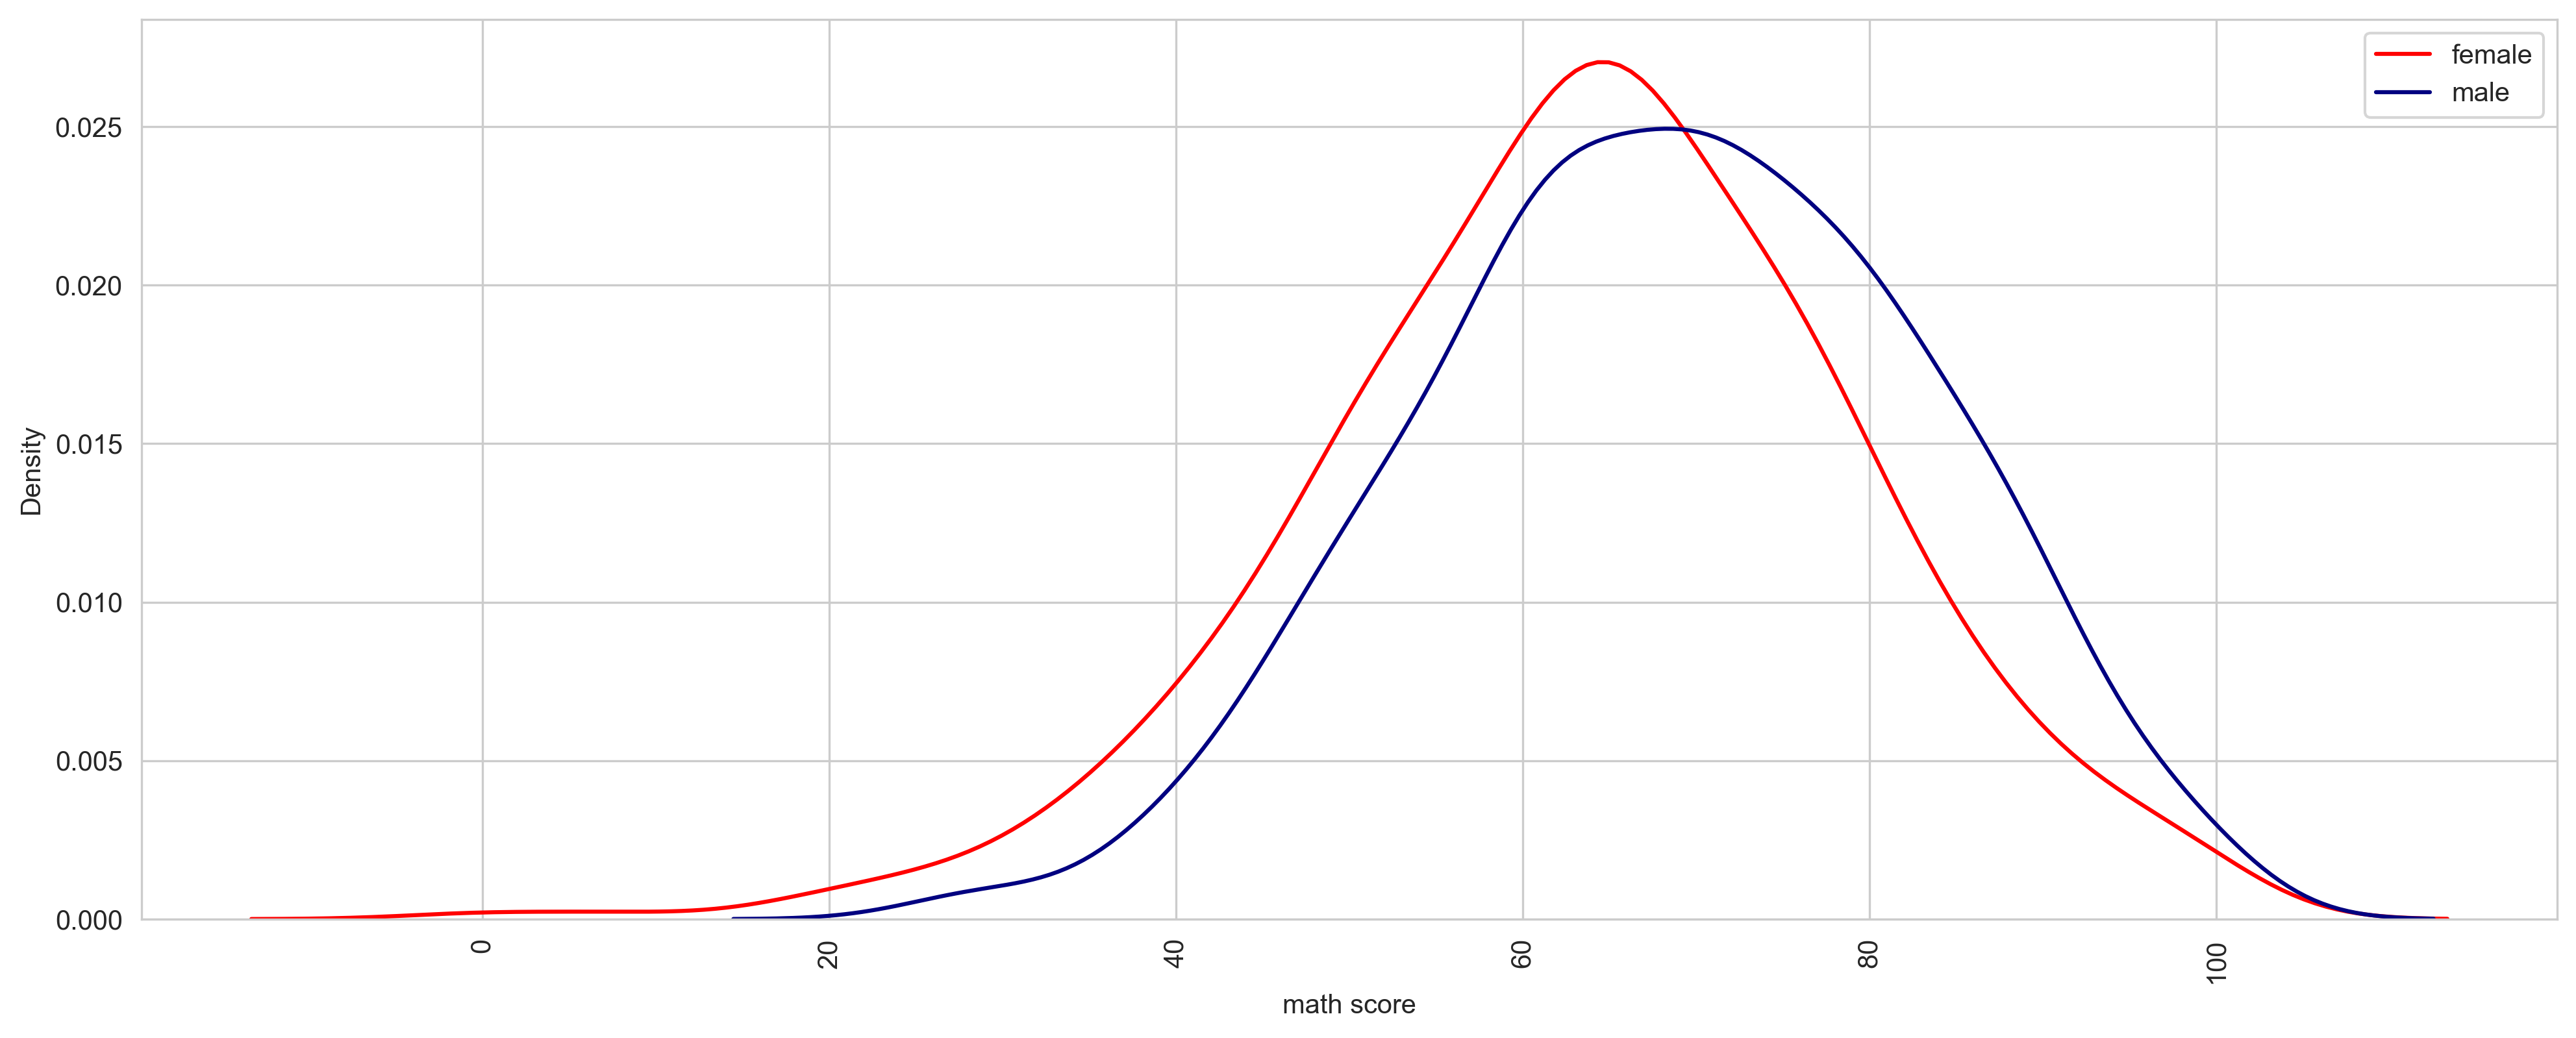

In [11]:
# Type 2 : Draw 2 Graph with label
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.kdeplot(data=data[data['gender'] == 'female']['math score'], color='red', ax=ax, label='female')
sns.kdeplot(data=data[data['gender'] == 'male']['math score'], color='navy', ax=ax, label='male')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

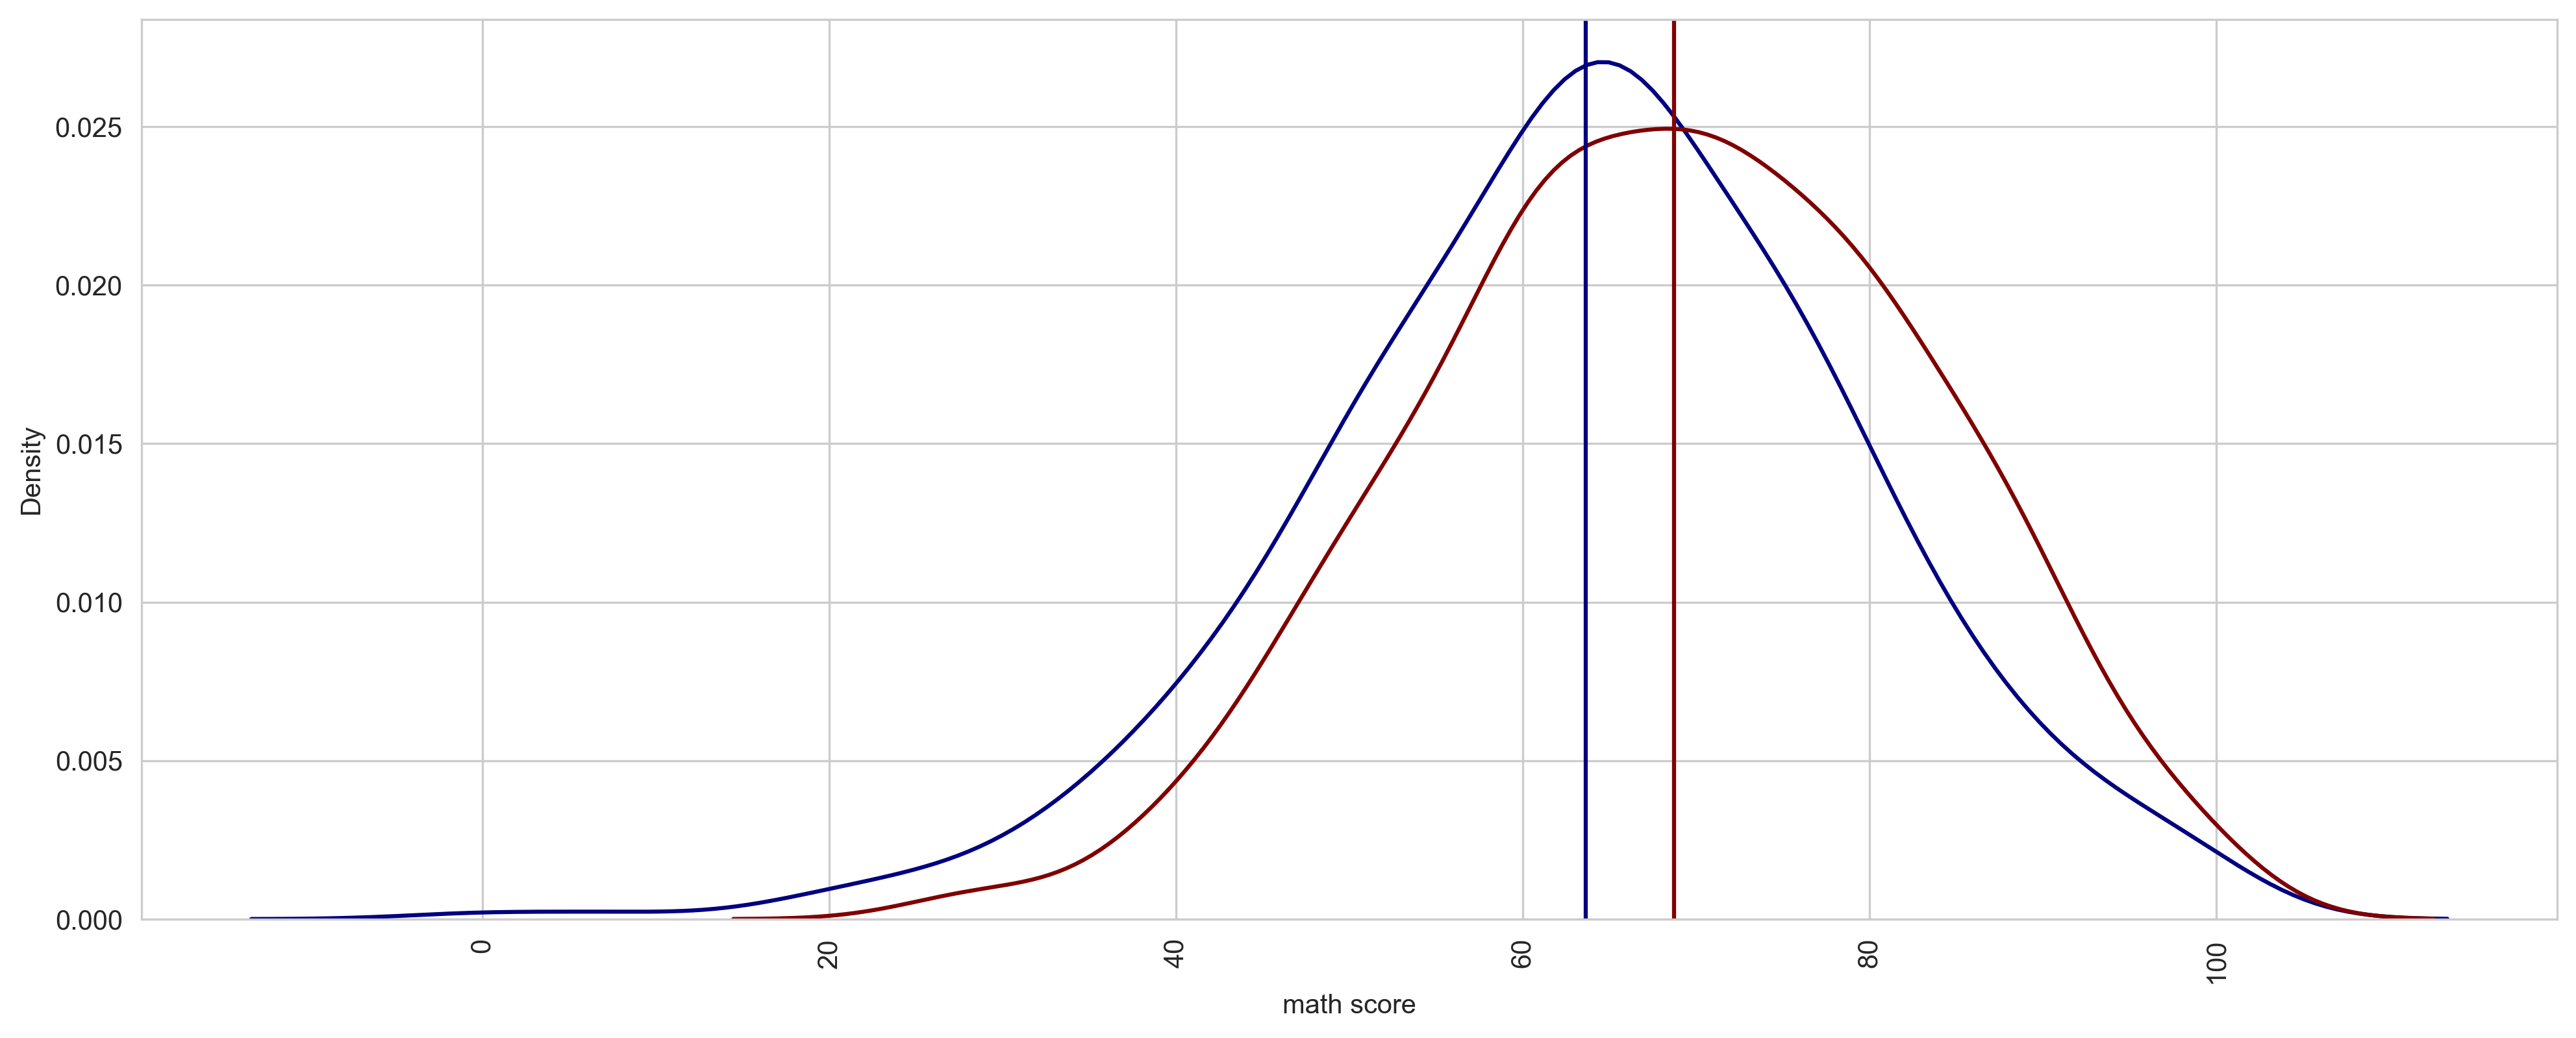

In [12]:
# Type 3 : Add Avg Line
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.kdeplot(
    data=data[data['gender'] == 'female']['math score'], 
    color='navy', 
    ax=ax, 
    label='female'
)

sns.kdeplot(
    data=data[data['gender'] == 'male']['math score'], 
    color='maroon', 
    ax=ax, 
    label='male'
)

# Average Line
plt.axvline(
    x=data[data['gender'] == 'female']['math score'].mean(),
    color='navy'
)

plt.axvline(
    x=data[data['gender'] == 'male']['math score'].mean(),
    color='maroon'
)

plt.legend
plt.xticks(rotation='vertical')
plt.show()

##### Plotly : ff.creat_distplot
* Distplots

In Plotly, You can use `import plotly.figure_factory as ff.`

In [15]:
# Type 1 : Default
import plotly.figure_factory as ff

fig = ff.create_distplot(
    [data[data['gender'] == 'male']['math score'],
     data[data['gender'] == 'female']['math score']],
    ['male', 'female'], )

fig.show()